# Data Preparation and Cleaning

## **Add Category Column**


This Power Query code snippet aims to categorize Revolut transactions based on their descriptions. It uses a series of nested if and else if statements to check for specific keywords or transaction types within the "Description" column.

For example, if the "Type" is "ATM", the category is automatically set to "ATM". If the "Type" is "TRANSFER" and the description contains the word "From", it's categorized as "Transfer From Friends". This pattern continues with numerous conditions to categorize transactions into categories like "Food & Dining", "Retail", "Transport", and more.



> `= Table.AddColumn(#"Changed Type", "Category", each if [Type] = "ATM" then "ATM"
else if [Type] = "TRANSFER" and Text.Contains([Description], "From") then "Transfer From Friends"
else if [Type] = "TRANSFER" and Text.Contains([Description], "To") then "Money To Friends"
else if [Type] = "TOPUP" or Text.Contains([Description], "Top-Up") or Text.Contains([Description], "Vodafone") or Text.Contains([Description], "Balance migration") or Text.Contains([Description], "GoMo") or Text.Contains([Description], "Rebtel") then "Transfers & Top-Ups"
else if [Type] = "FEE" or Text.Contains([Description], "Irish Stamp Duty") or Text.Contains([Description], "FX") or Text.Contains([Description], "Exchanged") then "Finance & Banking"
else if [Type] = "REFUND" or [Type] = "TEMP_BLOCK" then "Refund and Temp Block"
else if [Type] = "CARD_PAYMENT" and (Text.Contains([Description], "gym") or Text.Contains([Description], "protein")) then "Health and Fitness"
else if [Type] = "CARD_PAYMENT" and (Text.Contains([Description], "SuperValu") or Text.Contains([Description], "Daybreak") or Text.Contains([Description], "Spar") or Text.Contains([Description], "Centra") or Text.Contains([Description], "Dealz") or Text.Contains([Description], "Currys") or Text.Contains([Description], "Earfun") or Text.Contains([Description], "Earth Angel") or Text.Contains([Description], "Asian") or Text.Contains([Description], "Fresh The Good Food Market")) then "Retail"
else if [Type] = "CARD_PAYMENT" and (Text.Contains([Description], "food") or Text.Contains([Description], "Burger King") or Text.Contains([Description], "McDonalds") or Text.Contains([Description], "KFC") or Text.Contains([Description], "Wok") or Text.Contains([Description], "InterContinental") or Text.Contains([Description], "Ohana") or Text.Contains([Description], "Zozimuz")) then "Food & Dining"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Department of Justice") then "Visa Application"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Trésorerie Générale du Royaume") then "Visa Application"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Nigeria Immigration Service") then "Visa Application"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Remitly") then "FX Transfer"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Bazar El Hamra") then "Clothing"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "An Post") then "Postal"
else if [Type] = "CARD_PAYMENT" and (Text.Contains([Description], "Patreon") or Text.Contains([Description], "Oracle America, Inc.") or Text.Contains([Description], "MeetUs Media")) then "Online Subscription"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Behan Vending Services") then "Vending Machine"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "One Stop Repair Centre") then "Retail"
else if [Type] = "CARD_PAYMENT" and Text.Contains([Description], "Liffey Valley Parking") then "Parking"
else if Text.Contains([Description], "Tesco") or Text.Contains([Description], "Lidl") or Text.Contains([Description], "SuperValu") or Text.Contains([Description], "ALDI") or Text.Contains([Description], "Dunnes Stores") then "Retail"
else if Text.Contains([Description], "Just Eat") or Text.Contains([Description], "Domino's") or Text.Contains([Description], "Deliveroo") or Text.Contains([Description], "Subway") or Text.Contains([Description], "Costa Coffee") or Text.Contains([Description], "Starbucks") or Text.Contains([Description], "Texas Fried Chicken") or Text.Contains([Description], "Boojum") or Text.Contains([Description], "Fruit Tonic Juice Bar") then "Food & Dining"
else if Text.Contains([Description], "Amazon") or Text.Contains([Description], "Udemy") or Text.Contains([Description], "Netflix") or Text.Contains([Description], "Google") or Text.Contains([Description], "Discord") or Text.Contains([Description], "Steam") or Text.Contains([Description], "Flutterwave") or Text.Contains([Description], "Resume.co") or Text.Contains([Description], "NordVPN") then "Online Services"
else if Text.Contains([Description], "Transport for Ireland") or Text.Contains([Description], "Luas") or Text.Contains([Description], "Uber") or Text.Contains([Description], "Bolt") or Text.Contains([Description], "Aircoach") or Text.Contains([Description], "Taxi") or Text.Contains([Description], "National Express") then "Transport"
else if Text.Contains([Description], "H&M") or Text.Contains([Description], "ZARA") or Text.Contains([Description], "River Island") or Text.Contains([Description], "Penneys") or Text.Contains([Description], "Brown Thomas") or Text.Contains([Description], "Tdl Imports & Exports") then "Clothing & Fashion"
else if Text.Contains([Description], "Boots") or Text.Contains([Description], "Pharmacy") or Text.Contains([Description], "Clinic") or Text.Contains([Description], "Northwood Dry Cleaners") or Text.Contains([Description], "Www.spectrumcare.ie") or Text.Contains([Description], "Medina Herbal I") then "Health & Wellness"
else if Text.Contains([Description], "Gaming") or Text.Contains([Description], "Nintendo") or Text.Contains([Description], "PlayStation") or Text.Contains([Description], "GameStop") or Text.Contains([Description], "Torn") then "Entertainment & Gaming"
else if Text.Contains([Description], "The Workman's Club") or Text.Contains([Description], "The Living Room") or Text.Contains([Description], "Twenty Two Night Club") then "Night Life"
else if Text.Contains([Description], "Petstop") or Text.Contains([Description], "Troys Butchers") or Text.Contains([Description], "Carney Quality Meats") then "Pet & Meat Shops"
else if Text.Contains([Description], "Gas Station") or Text.Contains([Description], "Texaco") or Text.Contains([Description], "Circle K") then "Fuel & Gas Stations"
else if Text.Contains([Description], "Education") or Text.Contains([Description], "Dublin City University") or Text.Contains([Description], "Road Safety Authority") then "Education & Services"
else "Other")`



## **Fill Down Missing Balance Columns**




This Power Query code snippet uses the Table.FillDown function to handle missing values in the "Balance" column of my dataset.

If there are any gaps in the "Balance" column where values are missing, this code will fill those gaps by copying the last available balance value down the column until it encounters another non-blank balance value.


> `= Table.FillDown(#"Added Custom",{"Balance"})`




## **Add Income/Expense Column**




This Power Query code snippet creates a new column named "Income/Expense" to classify each transaction as either "Income" or "Expense".

It checks the value in the "Amount" column of each row.

*   If the "Amount" is greater than 0 (positive), it assigns the value "Income" to the new "Income/Expense" column for that row.

*   If the "Amount" is less than 0 (negative), it assigns the value "Expense" to the "Income/Expense" column for that row.


> `= Table.AddColumn(#"Filled Down", "Income/Expense", each if([Amount])> 0 then "Income" else "Expense")`


# Data Modeling

Once the data was satisfactorily cleaned, The datasets were designed using the principles of fact and dim data modelling concepts.

**Dimension Tables:**


*   **Dim Date:** This table contains date-related attributes such as Date, Day of Week, Month, Quarter, and Year. It enables time-series analysis and granular date-level filtering.
*   **Dim Type:** This table stores information about transaction types and allows for analysis based on transaction categories. The Type column details whether the transaction was an ATM, Transfer, or Card Payment. The Category column includes more details, such as food and Dining, Health and Wellness, Retail, and Entertainment. The Description column furthers that detail by giving the merchant name, e.g., Lidl, Tesco, ATM Used, or even Transfer Recipient.
*   **Dim Currency:** This table contains information about the currencies involved in transactions. It enables the analysis of transactions in different currencies.
*   **Dim Product:** This table holds information about the Revolut Products used e.g. Current Account. It enables the analysis of transactions on different Revolut products.
*   **Dim State:** This is the state of the transaction, whether it was completed, or reverted. It enables the analysis of the state of different transactions.m

**Fact Table:**

**Fact RevTX:** This central table holds the core transaction data, including:


*   DateID: Foreign key referencing the Dim Date table.
*   TypeID: Foreign key referencing the Dim Type table.
*   CurrencyID: Foreign key referencing the Dim Currency table.
*   ProductID: Foreign key referencing the Dim Product table.
*   StateID: Foreign key referencing the Dim State table.
*   Amount: Transaction amount.
*   Balance: Account balance after the transaction.
*   Income/Expense: Indicates whether the transaction is income or expense.

**Relationships:**
The Fact RevTX table has many-to-one relationships with all the dimension tables. This allows for flexible analysis by combining data from different dimensions.



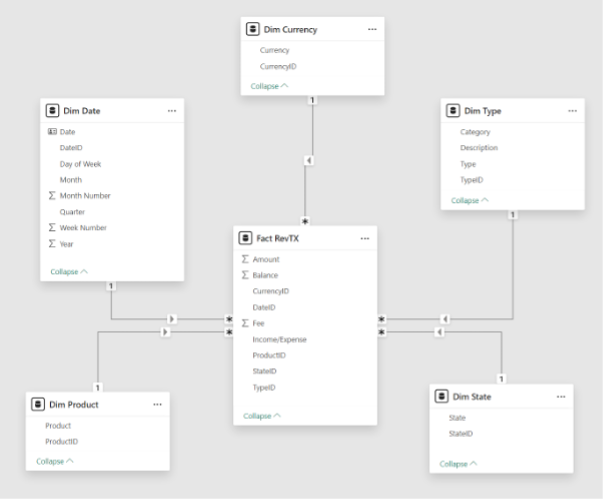

## **Data Dimension**



**Creating the Date Dimension Table**

A foundational element of the data model is the Date Dimension table. This table is crucial reference for date-level analysis.

**Implementation:**

* **Custom Date Table Creation:** I leveraged Power Query to dynamically generate a comprehensive Date Dimension table. This involved creating a sequence of dates and calculating attributes such as Day of Week, Month, Quarter, and Year.
* **Incorporating Best Practices:** To ensure the Date Dimension table adheres to industry standards and facilitates robust analysis, I consulted and incorporated insights from reputable sources:
    * **Gina M. Gonek's "Power BI Date/Time Dimension Toolkit"** ([https://ginameronek.com/2014/10/01/its-just-a-matter-of-time-power-bi-date-time-dimension-toolkit/](https://ginameronek.com/2014/10/01/its-just-a-matter-of-time-power-bi-date-time-dimension-toolkit/)): This resource provided valuable guidance on best practices for creating and utilizing Date Dimension tables within the Power BI environment.
    * **Devin Knight's "Creating a Date Dimension with Power Query"** ([https://devinknightsql.com/2015/06/16/creating-a-date-dimension-with-power-query/](https://devinknightsql.com/2015/06/16/creating-a-date-dimension-with-power-query/)): This guide offered practical insights and code examples for implementing a Date Dimension table effectively within the Power Query editor.

**Key Features of the Date Dimension Table:**

* **Dynamic Date Range:** The table is designed to dynamically adjust to accommodate evolving analysis needs, ensuring comprehensive coverage across the desired time period.
* **Hierarchical Attributes:** The inclusion of attributes like Year, Quarter, and Month enables flexible hierarchical drilldown within visualizations, providing a nuanced understanding of time-based trends.